In [1]:
#impoted all library as per need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Weather Training Data.csv')

In [3]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [4]:
#removed the target column and which look not useful
df.drop(['row ID','RainTomorrow'],inplace=True,axis=1)

In [5]:
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No


In [6]:
df.shape

(99516, 21)

In [7]:
#checking info which can help to get details about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    56985 non-null  float64
 5   Sunshine       52199 non-null  float64
 6   WindGustDir    92995 non-null  object 
 7   WindGustSpeed  93036 non-null  float64
 8   WindDir9am     92510 non-null  object 
 9   WindDir3pm     96868 non-null  object 
 10  WindSpeed9am   98581 non-null  float64
 11  WindSpeed3pm   97681 non-null  float64
 12  Humidity9am    98283 non-null  float64
 13  Humidity3pm    97010 non-null  float64
 14  Pressure9am    89768 non-null  float64
 15  Pressure3pm    89780 non-null  float64
 16  Cloud9am       61944 non-null  float64
 17  Cloud3pm       59514 non-null  float64
 18  Temp9a

In [8]:
#checking null value
df.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
dtype: int64

In [9]:
#checking the null value persentage which will help me take decision abut how to deal with this
df.isnull().sum()/len(df)*100

Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
dtype: float64

In [10]:
#basic stats of data in transpose form
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,99073.0,12.176266,6.390882,-8.5,7.6,12.0,16.8,33.9
MaxTemp,99286.0,23.218513,7.115072,-4.1,17.9,22.6,28.2,48.1
Rainfall,98537.0,2.353024,8.487866,0.0,0.0,0.0,0.8,371.0
Evaporation,56985.0,5.461320,4.162490,0.0,2.6,4.8,7.4,86.2
Sunshine,52199.0,7.615090,3.783008,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,93036.0,39.976966,13.581524,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,98581.0,14.004849,8.902323,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,97681.0,18.650464,8.801827,0.0,13.0,19.0,24.0,87.0
Humidity9am,98283.0,68.866376,19.074951,0.0,57.0,70.0,83.0,100.0
Humidity3pm,97010.0,51.433296,20.777616,0.0,37.0,52.0,65.0,100.0


In [11]:
#for checking the correlation b/w various features of data to make a good model of data
cor=df.corr()

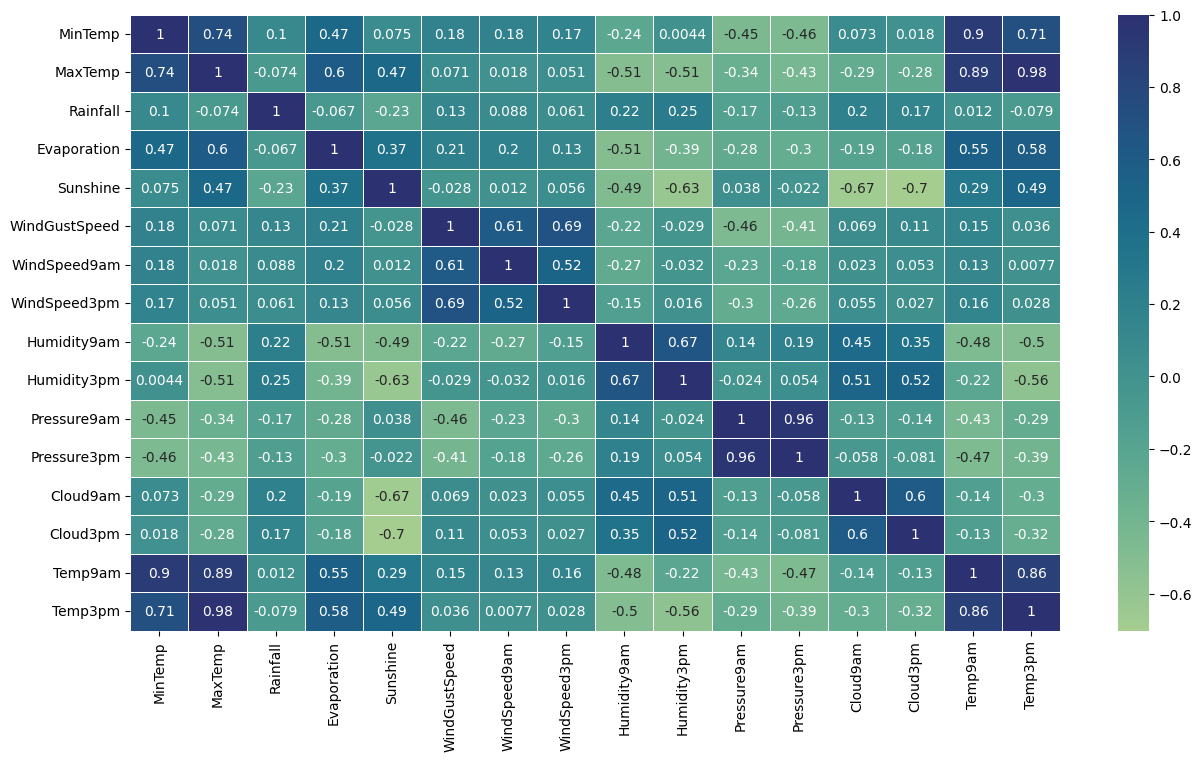

In [12]:
# heatmap with good pallate shows the good insides of data
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True,linewidth=.5,cmap="crest")
plt.show()

# Outliers treatment

In [13]:
col=list(df.columns)
col

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

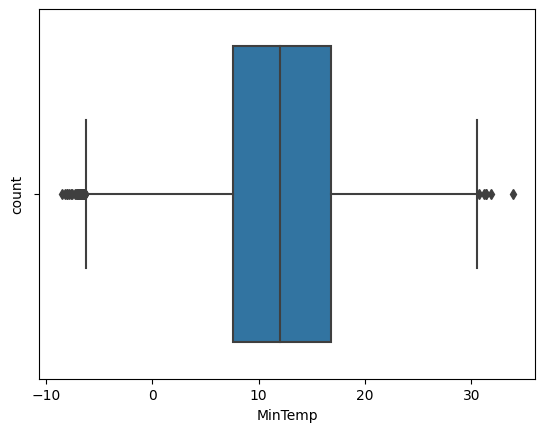

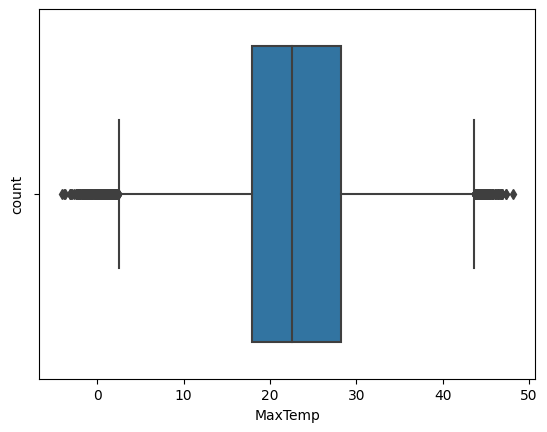

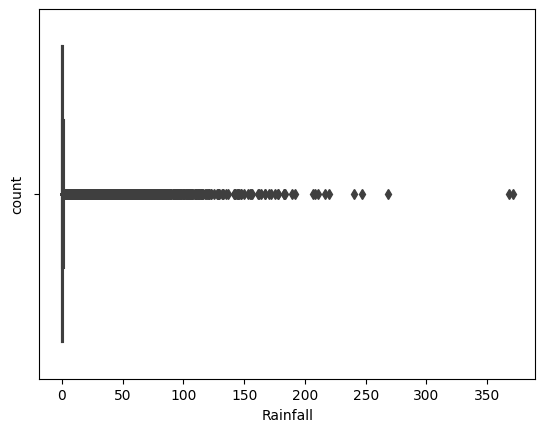

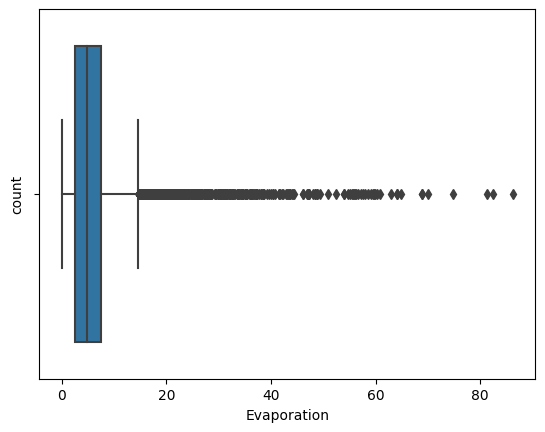

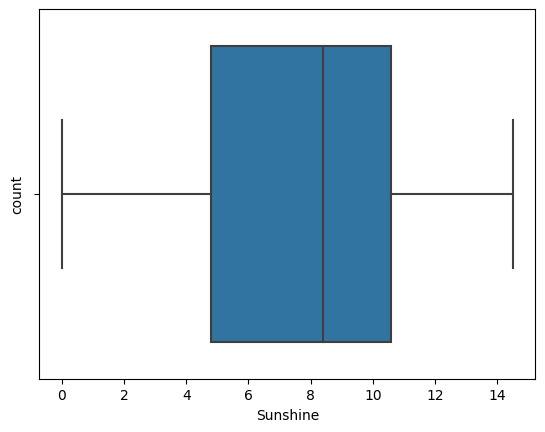

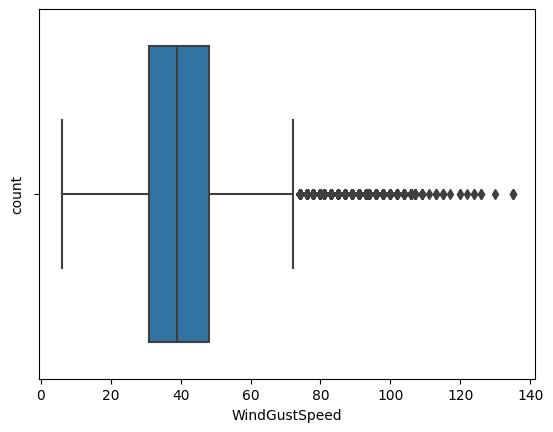

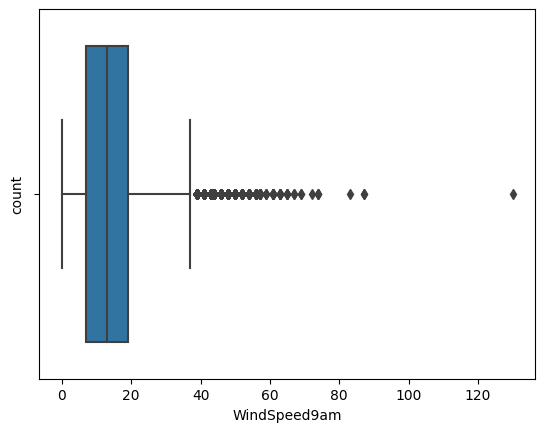

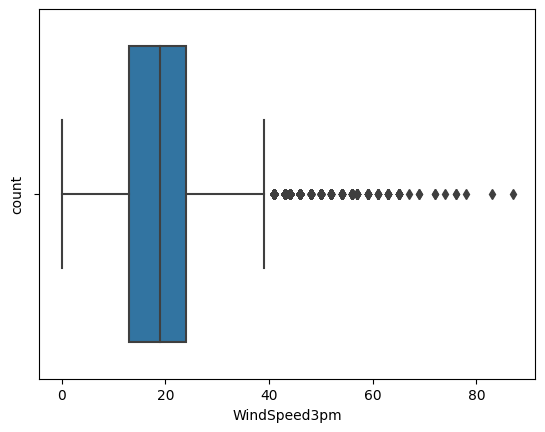

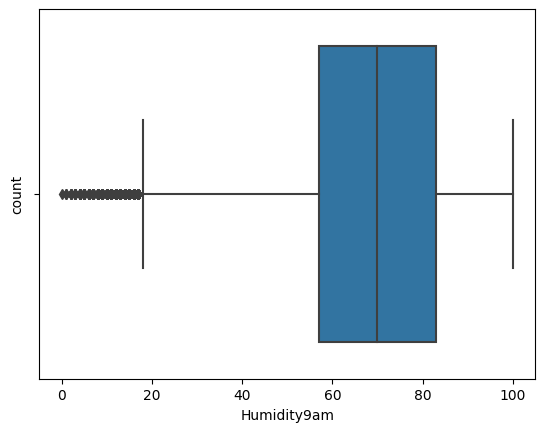

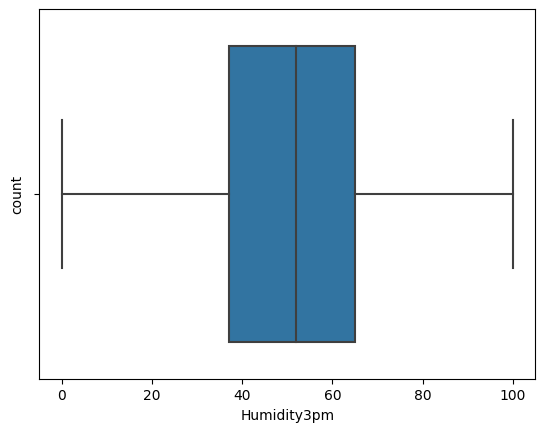

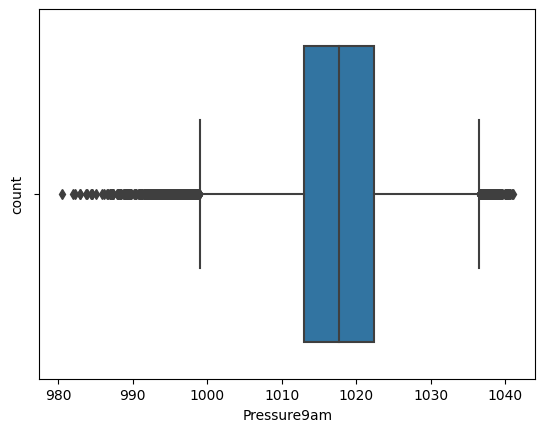

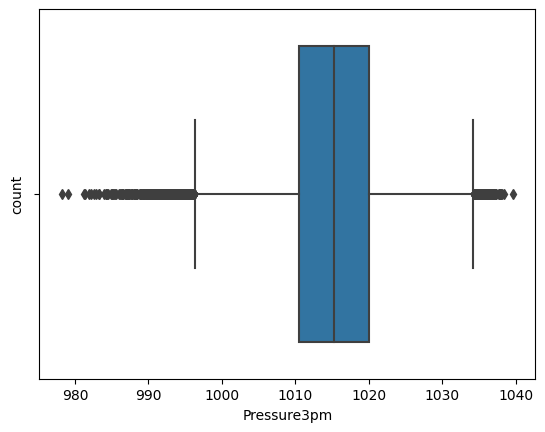

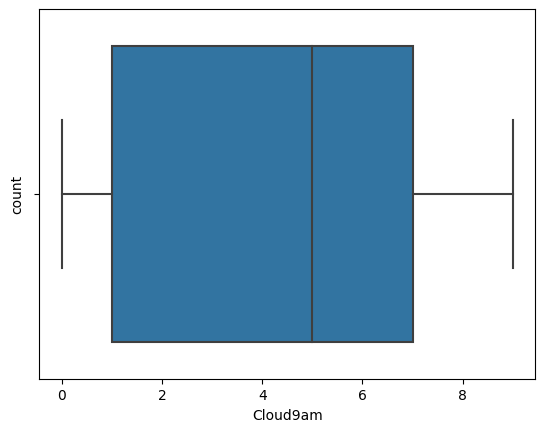

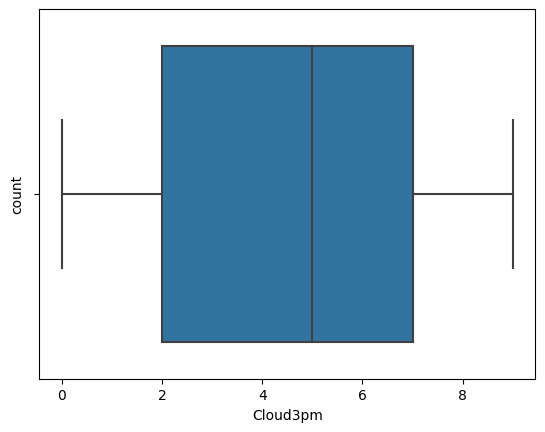

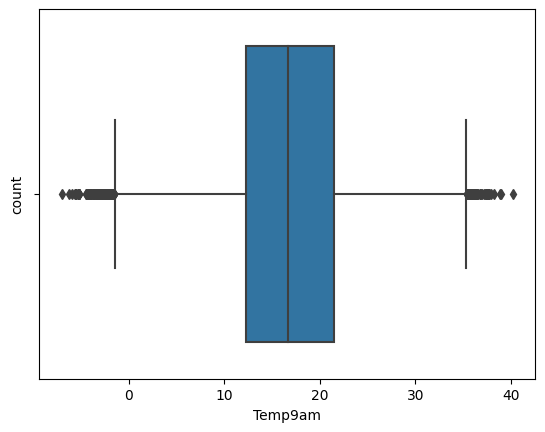

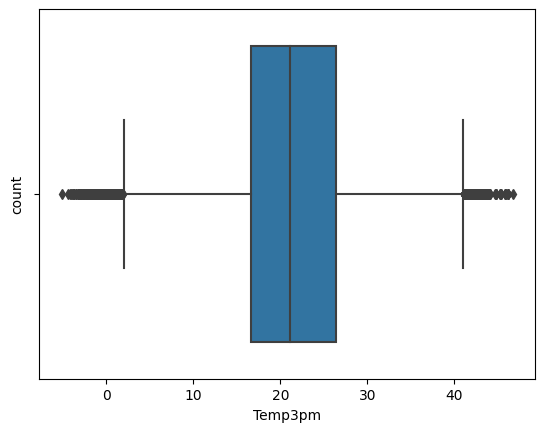

In [14]:
#checking the outliears for treating them
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [15]:
#removing the outliear with IQR method 

col_names=['MinTemp','MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
Q1=df.MinTemp.quantile(0.25)
Q3=df.MinTemp.quantile(0.75)
IQR=Q3-Q1
df=df[(df.MinTemp>=Q1-1.5*IQR)&(df.MinTemp<=Q3+1.5*IQR)]

Q1=df.MaxTemp.quantile(0.25)
Q3=df.MaxTemp.quantile(0.75)
IQR=Q3-Q1
df=df[(df.MaxTemp>=Q1-1.5*IQR)&(df.MaxTemp<=Q3+1.5*IQR)]

Q1=df.Rainfall.quantile(0.25)
Q3=df.Rainfall.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Rainfall>=Q1-1.5*IQR)&(df.Rainfall<=Q3+1.5*IQR)]

Q1=df.Evaporation.quantile(0.25)
Q3=df.Evaporation.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Evaporation>=Q1-1.5*IQR)&(df.Evaporation<=Q3+1.5*IQR)]

Q1=df.WindGustSpeed.quantile(0.25)
Q3=df.WindGustSpeed.quantile(0.75)
IQR=Q3-Q1
df=df[(df.WindGustSpeed>=Q1-1.5*IQR)&(df.WindGustSpeed<=Q3+1.5*IQR)]

Q1=df.WindSpeed9am.quantile(0.25)
Q3=df.WindSpeed9am.quantile(0.75)
IQR=Q3-Q1
df=df[(df.WindSpeed9am>=Q1-1.5*IQR)&(df.WindSpeed9am<=Q3+1.5*IQR)]

Q1=df.WindSpeed3pm.quantile(0.25)
Q3=df.WindSpeed3pm.quantile(0.75)
IQR=Q3-Q1
df=df[(df.WindSpeed3pm>=Q1-1.5*IQR)&(df.WindSpeed3pm<=Q3+1.5*IQR)]

Q1=df.Humidity9am.quantile(0.25)
Q3=df.Humidity9am.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Humidity9am>=Q1-1.5*IQR)&(df.Humidity9am<=Q3+1.5*IQR)]

Q1=df.Pressure9am.quantile(0.25)
Q3=df.Pressure9am.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Pressure9am>=Q1-1.5*IQR)&(df.Pressure9am<=Q3+1.5*IQR)]

Q1=df.Pressure3pm.quantile(0.25)
Q3=df.Pressure3pm.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Pressure3pm>=Q1-1.5*IQR)&(df.Pressure3pm<=Q3+1.5*IQR)]

Q1=df.Temp9am.quantile(0.25)
Q3=df.Temp9am.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Temp9am>=Q1-1.5*IQR)&(df.Temp9am<=Q3+1.5*IQR)]

Q1=df.Temp3pm.quantile(0.25)
Q3=df.Temp3pm.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Temp3pm>=Q1-1.5*IQR)&(df.Temp3pm<=Q3+1.5*IQR)]

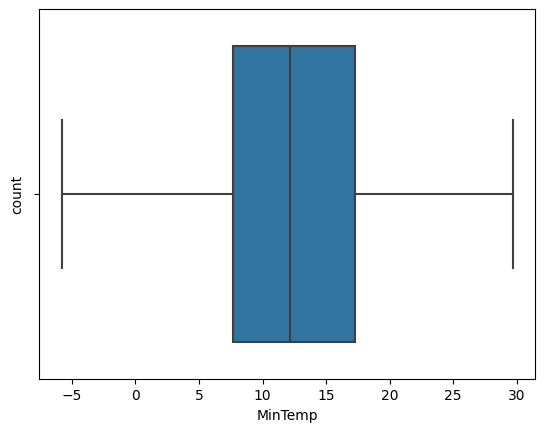

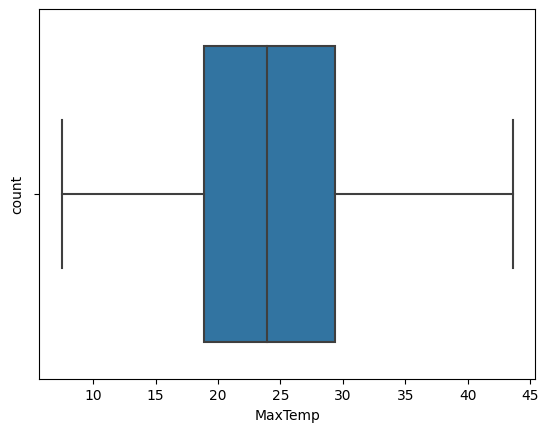

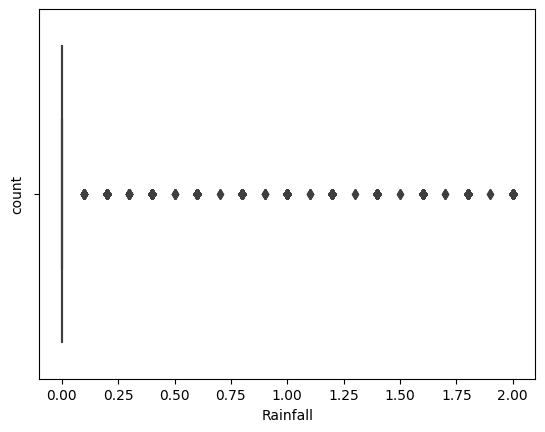

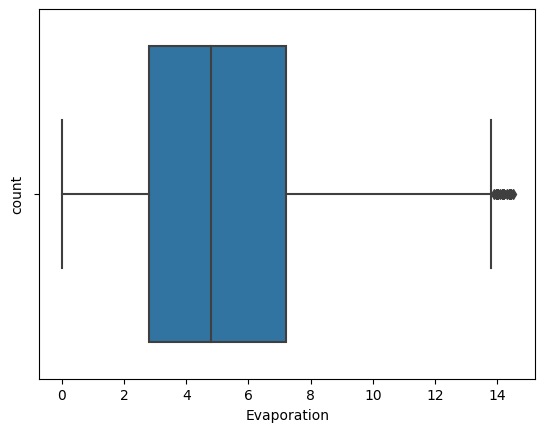

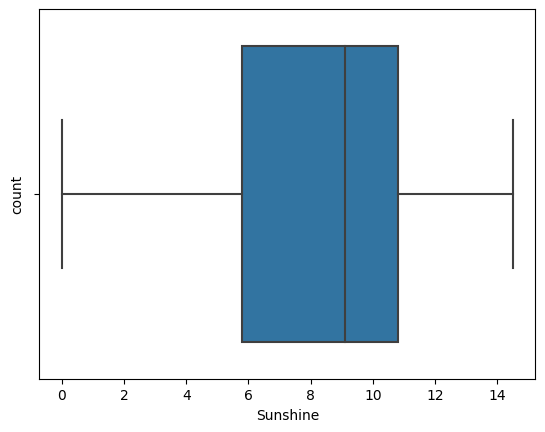

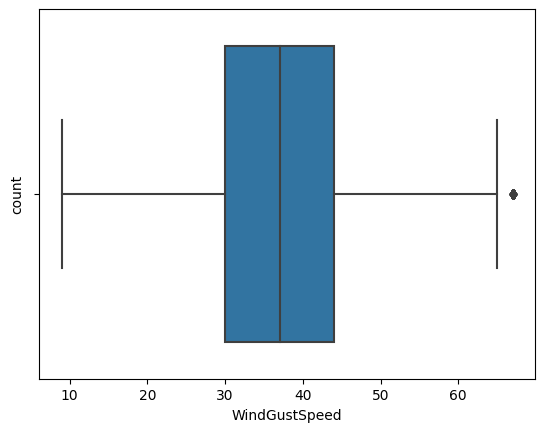

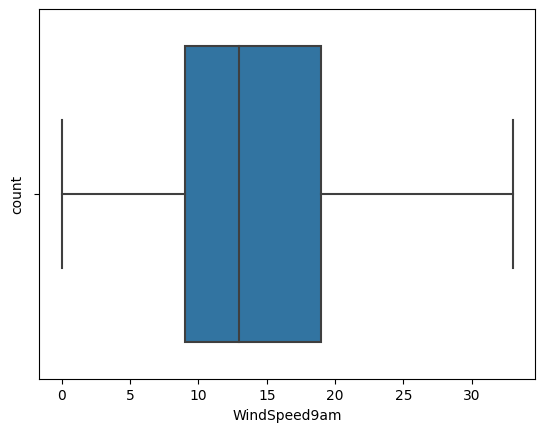

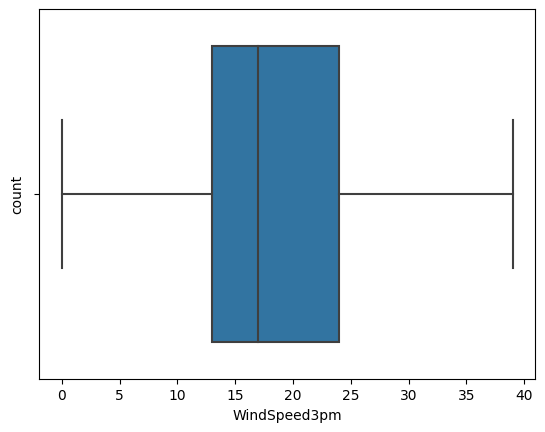

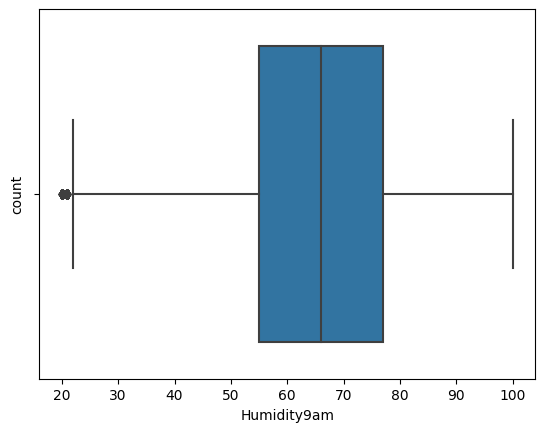

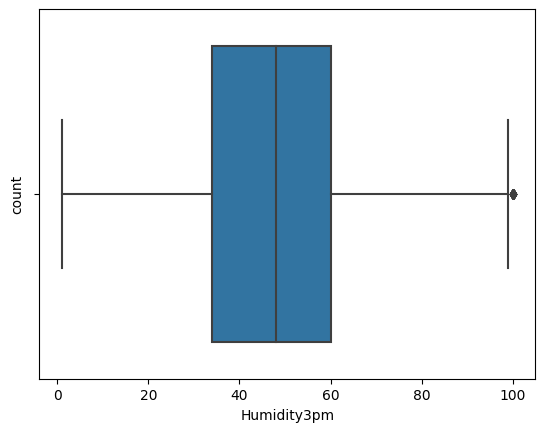

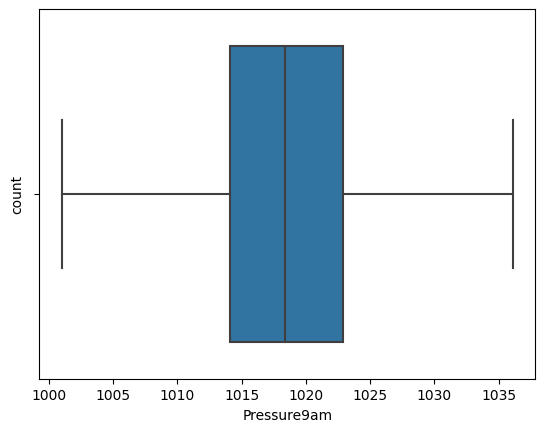

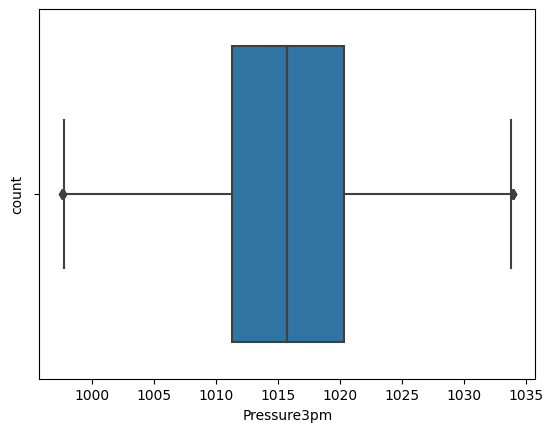

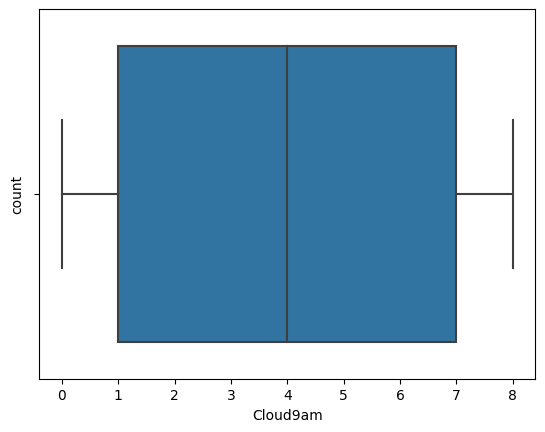

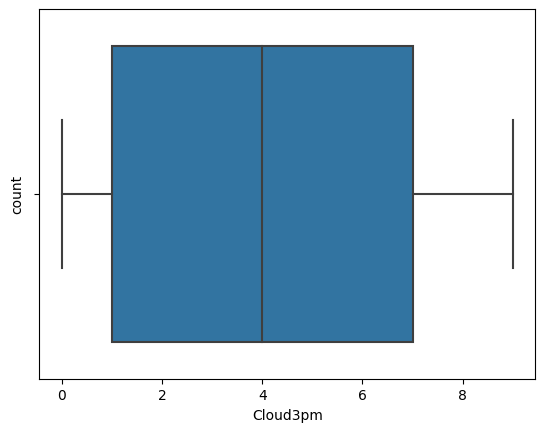

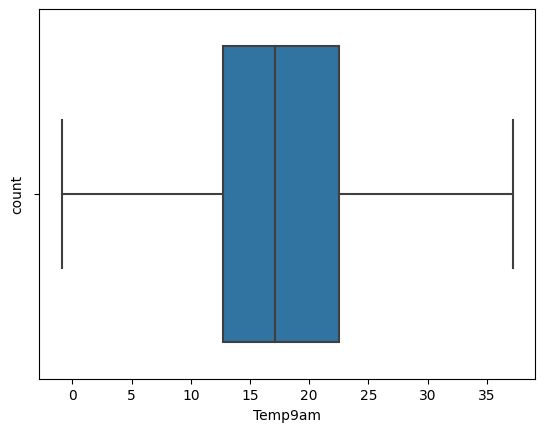

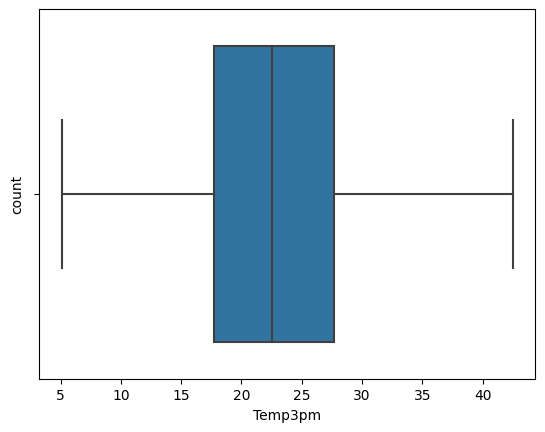

In [16]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [17]:
#we have removed the outliers and with missing values will also removed 
df.isnull().sum()/len(df)*100

Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine         12.545050
WindGustDir       0.010224
WindGustSpeed     0.000000
WindDir9am        4.176571
WindDir3pm        0.396186
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.161031
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         11.819135
Cloud3pm         13.889528
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
dtype: float64

In [18]:
df.shape

(39123, 21)

# I observed here without filling the null value if treat outlier i will droped approx 69% of data

i will go on with filling the null value with can give me better result 

In [19]:
#loading the dataset in another dataframe
df2=pd.read_csv('Weather Training Data.csv')

In [20]:
#droping some value
df2.drop(['row ID','Rainfall'],axis=1,inplace=True)

In [21]:
#this time i with see sample of data 
df2.sample(10)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
77172,Witchcliffe,6.0,17.0,NaN,NaN,W,56.0,NNW,WNW,4.0,...,NaN,NaN,1018.4,1015.0,NaN,NaN,13.0,16.3,Yes,1
26804,WaggaWagga,16.6,30.4,8.0,13.6,ENE,57.0,ENE,E,26.0,...,48.0,17.0,1017.9,1013.8,0.0,1.0,21.7,28.7,No,0
38903,Ballarat,5.3,13.2,NaN,NaN,N,54.0,N,N,28.0,...,68.0,72.0,1021.1,1017.7,NaN,8.0,9.3,12.8,No,1
59973,Cairns,22.1,30.5,6.2,10.3,E,33.0,S,ENE,13.0,...,63.0,59.0,1015.8,1013.8,1.0,1.0,26.8,28.8,No,0
58149,Brisbane,15.8,27.1,7.0,12.2,E,30.0,SE,E,13.0,...,49.0,44.0,1017.8,1014.9,3.0,2.0,24.0,25.3,No,0
62492,GoldCoast,13.4,20.6,NaN,NaN,S,56.0,S,S,28.0,...,63.0,53.0,1022.2,1020.2,NaN,NaN,16.6,18.5,No,0
43212,Sale,15.1,28.1,NaN,NaN,E,35.0,ENE,ESE,6.0,...,93.0,66.0,1013.4,1010.0,8.0,6.0,16.1,25.3,No,0
78877,PearceRAAF,16.9,30.9,NaN,11.3,ESE,63.0,E,SE,33.0,...,44.0,23.0,1020.2,1015.3,NaN,NaN,21.9,30.3,No,0
13194,NorahHead,20.4,25.1,NaN,NaN,NE,28.0,NNE,NE,13.0,...,85.0,76.0,1017.8,1015.6,NaN,NaN,21.6,24.1,No,0
94967,AliceSprings,5.7,23.3,20.2,NaN,E,37.0,E,ESE,19.0,...,24.0,11.0,1024.0,1020.0,NaN,NaN,15.4,22.3,No,0


In [22]:
df2.isnull().sum()/len(df2)*100

Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

### here i can see some features are approx 50% of data is missing so i will apply mixed approched some i will remove and some i will fill

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Evaporation    56985 non-null  float64
 4   Sunshine       52199 non-null  float64
 5   WindGustDir    92995 non-null  object 
 6   WindGustSpeed  93036 non-null  float64
 7   WindDir9am     92510 non-null  object 
 8   WindDir3pm     96868 non-null  object 
 9   WindSpeed9am   98581 non-null  float64
 10  WindSpeed3pm   97681 non-null  float64
 11  Humidity9am    98283 non-null  float64
 12  Humidity3pm    97010 non-null  float64
 13  Pressure9am    89768 non-null  float64
 14  Pressure3pm    89780 non-null  float64
 15  Cloud9am       61944 non-null  float64
 16  Cloud3pm       59514 non-null  float64
 17  Temp9am        98902 non-null  float64
 18  Temp3p

In [24]:
df2['Evaporation'].mean()

5.461319645520741

In [25]:
df2['Evaporation'].median()

4.8

In [26]:
#fill the data with Median which feature type was intger
df2['Evaporation']=df2['Evaporation'].fillna(df2['Evaporation'].median())
df2['Sunshine']=df2['Sunshine'].fillna(df2['Sunshine'].median())

In [27]:
df2['Cloud9am']=df2['Cloud9am'].fillna(df2['Cloud9am'].median())
df2['Cloud3pm']=df2['Cloud3pm'].fillna(df2['Cloud3pm'].median())

In [28]:
#fill the data with Mode which feature type was categecal
df2['WindDir3pm']=df2['WindDir3pm'].fillna(df2['WindDir3pm'].mode()[0])
df2['WindDir3pm']=df2['WindDir3pm'].fillna(df2['WindDir3pm'].mode()[0])
df2['RainToday']=df2['RainToday'].fillna(df2['RainToday'].mode()[0])

In [29]:
df2['Humidity3pm']=df2['Humidity3pm'].fillna(df2['Humidity3pm'].median())
df2['WindDir9am']=df2['WindDir9am'].fillna(df2['WindDir9am'].mode()[0])
df2['WindDir9am']=df2['WindDir9am'].fillna(df2['WindDir9am'].mode()[0])
df2['WindGustDir']=df2['WindGustDir'].fillna(df2['WindGustDir'].mode()[0])

In [30]:
df2['WindGustSpeed']=df2['WindGustSpeed'].fillna(df2['WindGustSpeed'].median())

In [31]:
df2.isnull().sum()/len(df2)*100

Location         0.000000
MinTemp          0.445155
MaxTemp          0.231119
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.939547
WindSpeed3pm     1.843925
Humidity9am      1.238997
Humidity3pm      0.000000
Pressure9am      9.795410
Pressure3pm      9.783351
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.616986
Temp3pm          1.913260
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

Still some features are there for which i can drop becasue persentage are less

In [32]:
df2.shape

(99516, 21)

In [33]:
df2.dropna(inplace=True)

In [34]:
df2.shape

(87646, 21)

# Outliears Treatment

In [35]:
col=list(df2.columns)
col

['Location',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

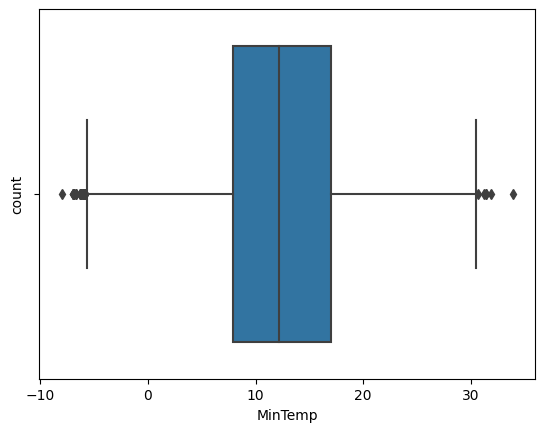

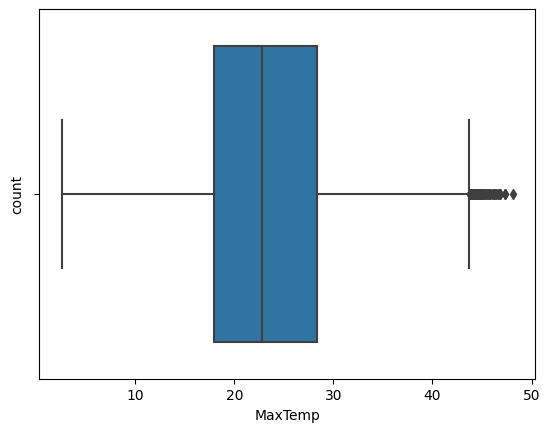

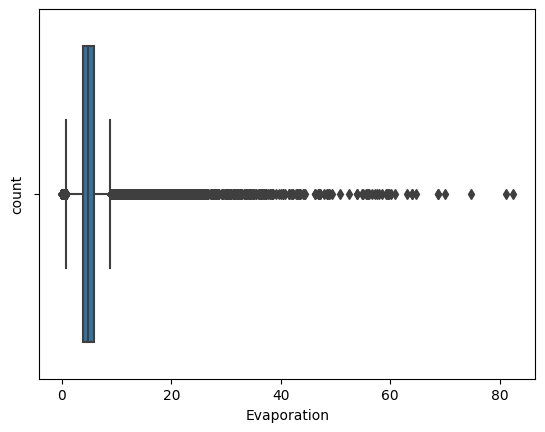

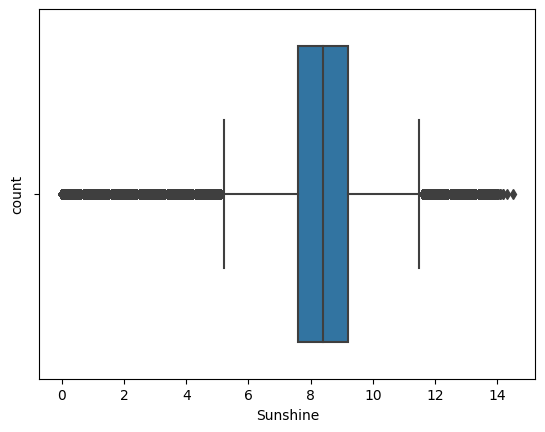

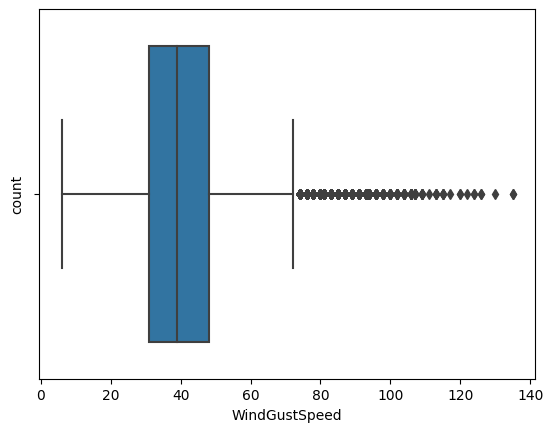

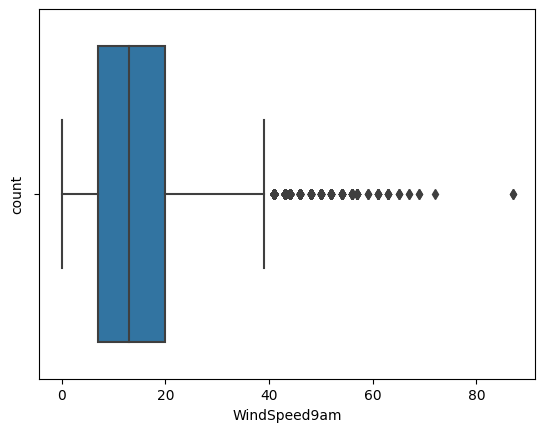

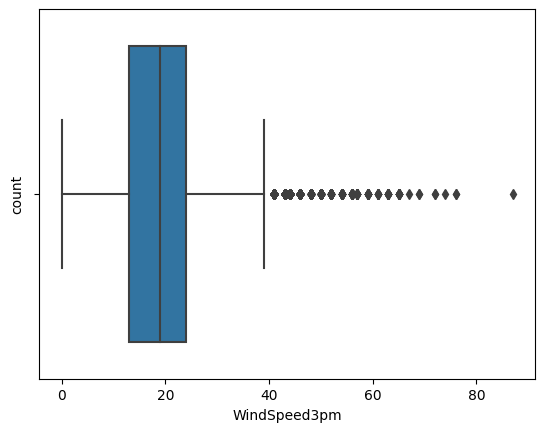

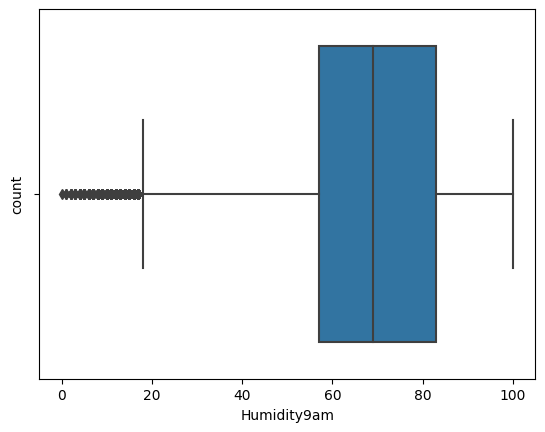

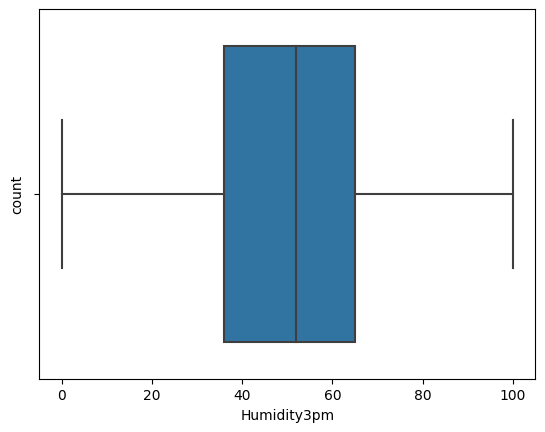

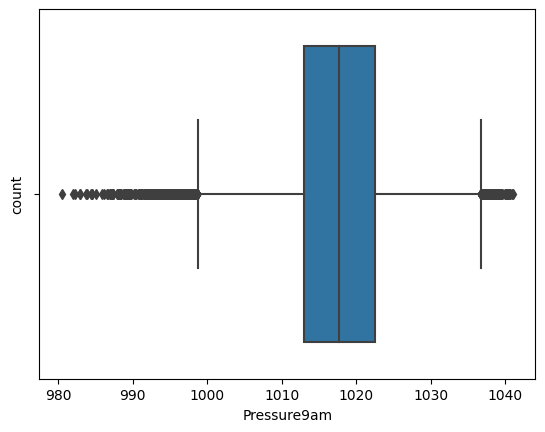

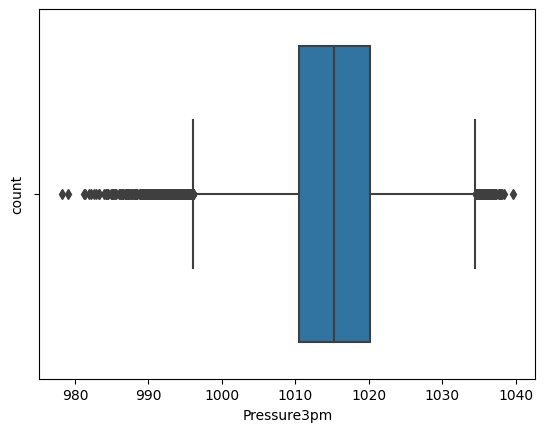

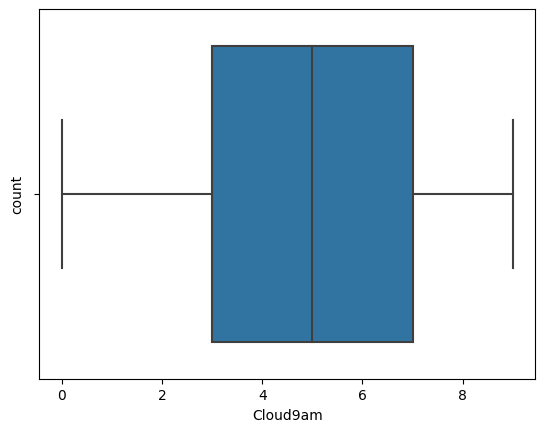

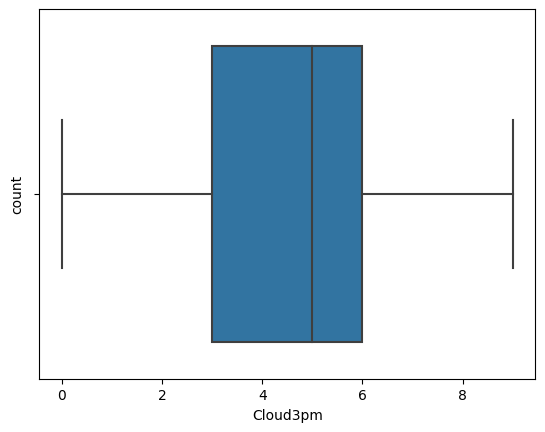

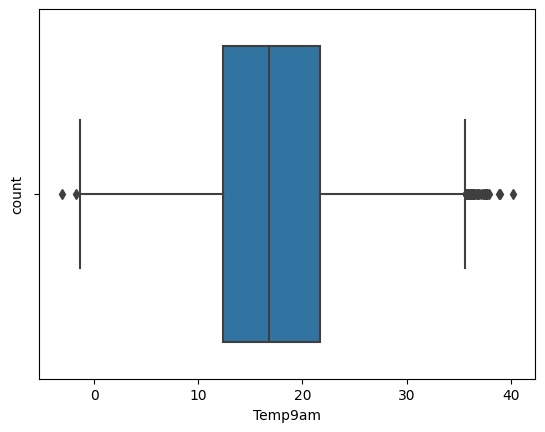

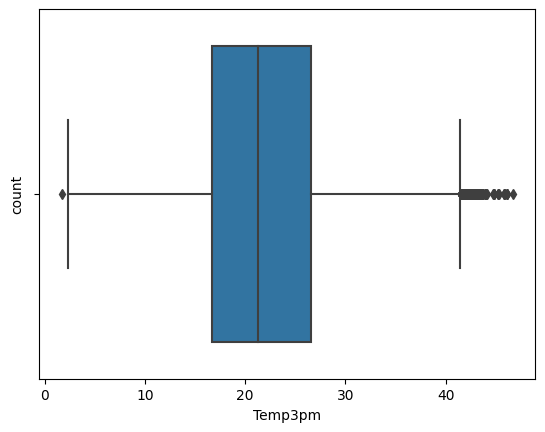

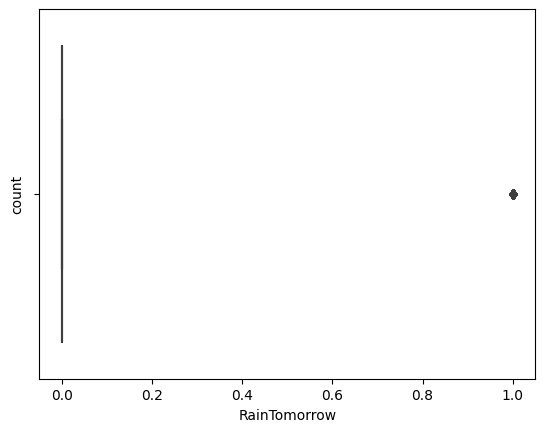

In [36]:
for col_name in col:
    if(df2[col_name].dtypes=='int64' or df2[col_name].dtypes=='float64'):
        sns.boxplot(df2[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [37]:
df2.shape

(87646, 21)

In [38]:
df2.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [39]:
df2['RainTomorrow'].value_counts()

0    68034
1    19612
Name: RainTomorrow, dtype: int64

In [40]:
df2.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,4.8,8.4,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0
1,Albury,7.4,25.1,4.8,8.4,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0
2,Albury,17.5,32.3,4.8,8.4,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,4.8,8.4,WNW,56.0,W,W,19.0,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,0
4,Albury,7.7,26.7,4.8,8.4,W,35.0,SSE,W,6.0,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,0


In [41]:
#Remove the outliers for neccesery features
Q1=df2.WindGustSpeed.quantile(0.25)
Q3=df2.WindGustSpeed.quantile(0.75)
IQR=Q3-Q1
df2=df2[(df2.WindGustSpeed>=Q1-1.5*IQR)&(df2.WindGustSpeed<=Q3+1.5*IQR)]



Q1=df2.Sunshine.quantile(0.25)
Q3=df2.Sunshine.quantile(0.75)
IQR=Q3-Q1
df2=df2[(df2.Sunshine>=Q1-1.5*IQR)&(df2.Sunshine<=Q3+1.5*IQR)]

# IV analysis for best predictive significance Categarical Features

In [42]:
df_new=pd.DataFrame(columns=['Feature','IV-Score'])

In [43]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [44]:
col_list = list(df2.columns)
for col in col_list:
    if col == 'RainTomorrow': 
        continue
    elif df2[col].dtype == 'object':
        df, iv = calculate_woe_iv(df2, col, 'RainTomorrow')
        df_new=df_new.append({'Feature':col, 'IV-Score': iv}, ignore_index=True)
df_new

,Feature,IV-Score
0,Location,0.218991
1,WindGustDir,0.064508
2,WindDir9am,0.088187
3,WindDir3pm,0.062053
4,RainToday,0.391232


IV <0.02 useless 
0.02 to 0.1 weak predictors 
0.1 to 0.3 medium predictors 
0.3 to 0.5 strong predictors 
0.5 suspicious 
Note:before calculating the weight of evidence make sure to bin the features if they are not categorical and make sure each bin sould have atleast 5% of data distribute in each bin

In [45]:
# we can take only Raintoday column 

In [46]:
# i will apply lebel encoding for cross checking of categerical impect of target columns
col_list=[]
for i in df2.columns:
    if((df2[i].dtypes=='object')):
        col_list.append(i)

In [47]:
# i pllied lebel encoding because i have alreaady enough features
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in col_list:
    df2[i]=labelencoder.fit_transform(df2[i])

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65956 entries, 0 to 99515
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       65956 non-null  int32  
 1   MinTemp        65956 non-null  float64
 2   MaxTemp        65956 non-null  float64
 3   Evaporation    65956 non-null  float64
 4   Sunshine       65956 non-null  float64
 5   WindGustDir    65956 non-null  int32  
 6   WindGustSpeed  65956 non-null  float64
 7   WindDir9am     65956 non-null  int32  
 8   WindDir3pm     65956 non-null  int32  
 9   WindSpeed9am   65956 non-null  float64
 10  WindSpeed3pm   65956 non-null  float64
 11  Humidity9am    65956 non-null  float64
 12  Humidity3pm    65956 non-null  float64
 13  Pressure9am    65956 non-null  float64
 14  Pressure3pm    65956 non-null  float64
 15  Cloud9am       65956 non-null  float64
 16  Cloud3pm       65956 non-null  float64
 17  Temp9am        65956 non-null  float64
 18  Temp3p

In [49]:
#sepration the data for spliting and appling the scaler
X=df2.iloc[:,0:20]

In [50]:
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,17.5,32.3,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
3,2,14.6,29.7,4.8,8.4,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0
4,2,7.7,26.7,4.8,8.4,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,37,8.0,20.7,4.8,8.4,2,41.0,9,0,19.0,26.0,56.0,32.0,1028.1,1024.3,5.0,7.0,11.6,20.0,0
99512,37,3.5,21.8,4.8,8.4,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0
99513,37,2.8,23.4,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0
99514,37,3.6,25.3,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0


In [51]:
#selecting the target columns
y=df2.iloc[:,-1]

In [52]:
y.sample(10)

83656    0
44855    0
9250     0
1755     1
73297    0
59007    0
32105    0
23428    0
67164    0
47881    0
Name: RainTomorrow, dtype: int64

In [53]:
#taking help of XGB classifies for selection of feartues (I tried many but best result found with that only)
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

[0.04164917 0.02620297 0.02812762 0.01881115 0.0494011  0.0275446
 0.07449423 0.02798484 0.03605899 0.02240455 0.02564159 0.02817834
 0.2706249  0.02682004 0.06225301 0.0223938  0.05218501 0.02685434
 0.02837661 0.10399317]


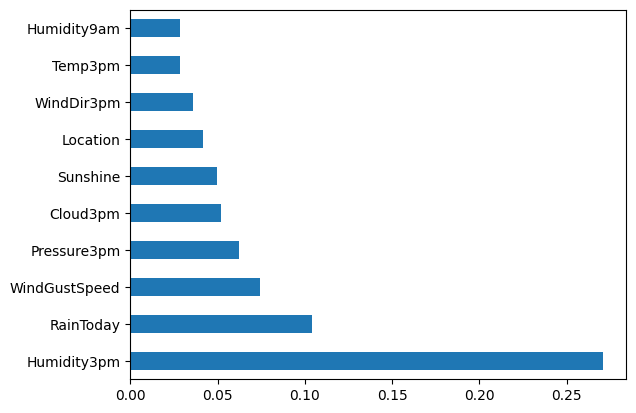

<Figure size 800x600 with 0 Axes>

In [54]:
print(model.feature_importances_) 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [55]:
#selecting the best columns suggested by the XGB
X=df2[['WindGustSpeed','Humidity3pm','Cloud3pm','Sunshine']]

In [56]:
#sns.boxplot(df2['WindDir9am'])

<AxesSubplot: ylabel='Density'>

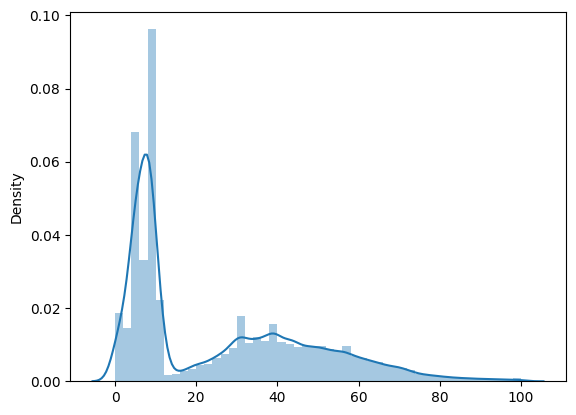

In [57]:
sns.distplot(X)

### this data is right skewed

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

<AxesSubplot: ylabel='Density'>

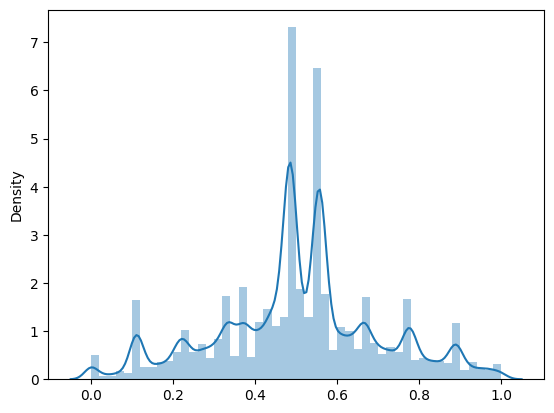

In [59]:
sns.distplot(scaled)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
std = scaler.fit_transform(X)

<AxesSubplot: ylabel='Density'>

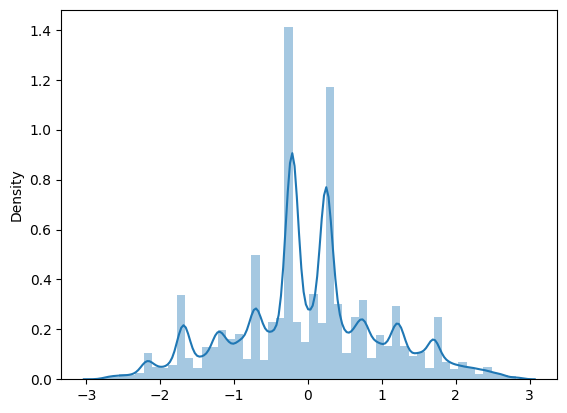

In [63]:
sns.distplot(std)

In [64]:
#this looks good i will apply standred scaler

In [65]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(std,y,train_size=0.70,random_state=0)

In [66]:
#build the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)
test_pred=logisticRegr.predict(x_test)
accuracy_score(y_test,test_pred)

0.8508616768585435

In [67]:
from sklearn.svm import SVC

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
model=SVC()
model.fit(x_train,y_train)
test_pred=model.predict(x_test)
accuracy_score(y_test,test_pred)

0.8508616768585435